# N-Grams

An n-Gram is a sequence of *n* words. N-gram models provide information about text by finding probabilistic distributions over word sequences.  It can help identify themeses quickly.  Some NLP applications that use N-Grams are:
* speech recognition
* machine translation
* predictive text input

## Unigram model
A unigram model is a model that uses a one word sequence.  Also, called **bag-of-word** model.  The example below uses a [Python Counter object](https://docs.python.org/3/library/collections.html#collections.Counter).

In [1]:
from nltk.corpus import brown
from collections import Counter

print("number of tokens {}".format(len(brown.words())))

number of tokens 1161192


In [2]:
counts = Counter(brown.words())
print("Counter Object")
print("size: {}".format(len(counts)))
total_count = sum(counts.values())
print("tokens: {}".format(total_count))

Counter Object
size: 56057
tokens: 1161192


In [3]:
print("The word 'the' appears {} times".format(counts['the'])) #the number of times 'the' appears
print("The word 'The' appears {} times".format(counts['The'])) #the number of times 'the' appears
print()

#20 most common words
most_common = counts.most_common(n=20)
for word, value in most_common:
    print(word, value)
print()

# frequencies
for word in counts:
    counts[word] /= float(total_count)

print(counts['the']) #frequency of the word 'the'


The word 'the' appears 62713 times
The word 'The' appears 7258 times

the 62713
, 58334
. 49346
of 36080
and 27915
to 25732
a 21881
in 19536
that 10237
is 10011
was 9777
for 8841
`` 8837
'' 8789
The 7258
with 7012
it 6723
as 6706
he 6566
his 6466

0.05400743374050114


We can generate a simple random sentence from the 1000 most common words.

In [4]:
import random

vocab = counts.most_common(n=1000)
sent_len = random.randint(10, 20) # a sentence is generally between 10 and 20 words
text = []

for pos in range(sent_len):
    nextword, count = random.choice(vocab)
    text.append(nextword)

sentence = ' '.join(text)
print(sentence)

students shot section results slowly going respect all still New what months Yet state wanted spirit two don't foreign


Scikit-learn’s [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) converst a list of words to a vector of word/token counts. Converts tokens to lowercase by default. Begin by creating a corpus containing a single document.

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

f = open("data/news.txt", "r")
news_text = f.read()
corpus = [news_text,] #corpus with a single document

Instantiate vectorizer.  Function `fit` learns the vocabulary. The `vocabulary_` attribute contains each word and its index.

In [6]:
vectorizer = CountVectorizer()
vec=vectorizer.fit(corpus)
print(vec.vocabulary_)

{'after': 18, 'days': 112, 'of': 271, 'living': 224, 'in': 196, 'the': 380, 'dark': 111, 'crude': 102, 'conditions': 94, 'millions': 249, 'texans': 376, 'had': 174, 'their': 381, 'power': 303, 'restored': 328, 'on': 275, 'thursday': 391, 'bringing': 68, 'some': 352, 'relief': 315, 'amid': 28, 'arctic': 39, 'blast': 64, 'that': 379, 'brought': 69, 'state': 360, 'water': 421, 'and': 30, 'infrastructure': 199, 'to': 393, 'its': 203, 'knees': 209, 'early': 129, 'morning': 253, 'nearly': 258, 'half': 175, 'million': 248, 'residents': 324, 'were': 427, 'without': 440, 'electricity': 134, 'but': 70, 'by': 71, 'midday': 243, 'just': 206, 'under': 408, '350': 7, '000': 0, 'remained': 317, 'according': 14, 'poweroutage': 304, 'us': 411, 'which': 433, 'tracks': 399, 'outages': 285, 'across': 15, 'country': 98, 'electric': 133, 'reliability': 314, 'council': 97, 'texas': 377, 'manages': 233, 'most': 254, 'grid': 173, 'said': 334, 'it': 202, 'made': 231, 'significant': 347, 'progress': 309, 'overni

Function `transform` creates a word document matrix.

In [9]:
matrix = vec.transform(corpus)
print(matrix.shape)
counts = matrix.toarray() 
print(counts)

(1, 452)
[[ 3  1  1  1  1  2  1  1  1  1  1  1  1  1  2  1  1  1  4  1  1  2  1  1
   1  1  2  2  1  1 17  1  1  1  1  1  1  1  1  1  4  1  1  2  1  1  4  1
   1  2  1  1  1  3  1  1  5  3 10  1  1  1  1  1  1  1  1  1  2  2  2  3
   1  1  1  1  1  1  1  1  2  1  1  1  1  1  1  1  1  1  1  1  1  1  3  1
   2  1  1  1  1  1  1  2  4  1  1  1  2  1  1  1  2  1  1  1  1  2  1  2
   1  1  2  3  1  1  1  1  1  1  1  1  1  2  7  2  3  1  2  3  3  1  1  1
   1  2  1  1  1  2  1  1  1  1  1  2  2  1  1  2  2  3  1  1  1  1  1  1
   1  2  1  1  1  4  9  1  5  9  2  3  1  2  1  1  1  1  2  1  1  3  5  1
   1  1  2  1 27  2  1  1  1  2  3  1  1  1  2  2  1  1  1  1  1  1  1  1
   1  1  1  1  1  1  1  1  1  3  2  1  1  3  1  1  1  1  2  1  2  1  2  2
   1  1  1  1  1  2  1  1  2  1  1  1  4  3  2  1  2  1  1  1  1  1  1  1
   1  1  2  2  1  1  1 30  1  1  2 12  2  1  2  2  3  1  1  2  3  6  2  1
   1  2  1  1  1  2  3  1  1  1  1  1  1  2  2 14  1  1  1  1  2  1  1  2
   1  2  1  1  3  2  1  1  1 

Identify the most frequent words.

In [10]:
words_freq = [(word, counts[0, idx]) for word, idx in vec.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda freq: freq[1], reverse=True) #sort by word count
print(words_freq[:10])

[('the', 52), ('of', 30), ('in', 27), ('to', 25), ('and', 17), ('power', 14), ('that', 13), ('said', 13), ('on', 12), ('been', 10)]


## Bigram Model

Bigrams are two word sequences. When using the NLTK bigrams library, the `pad` arguments allow us to capture bigrams at the beginning and end of a sentence.

In [17]:
from nltk import bigrams
from nltk import sent_tokenize
from nltk import word_tokenize

sentences = sent_tokenize(news_text)
tokenized_sentences = [word_tokenize(sentence) for sentence in sentences]
list(bigrams(tokenized_sentences[0], pad_left=True, pad_right=True))

[(None, 'After'),
 ('After', 'days'),
 ('days', 'of'),
 ('of', 'living'),
 ('living', 'in'),
 ('in', 'the'),
 ('the', 'dark'),
 ('dark', 'in'),
 ('in', 'crude'),
 ('crude', 'conditions'),
 ('conditions', ','),
 (',', 'millions'),
 ('millions', 'of'),
 ('of', 'Texans'),
 ('Texans', 'had'),
 ('had', 'their'),
 ('their', 'power'),
 ('power', 'restored'),
 ('restored', 'on'),
 ('on', 'Thursday'),
 ('Thursday', ','),
 (',', 'bringing'),
 ('bringing', 'some'),
 ('some', 'relief'),
 ('relief', 'amid'),
 ('amid', 'the'),
 ('the', 'arctic'),
 ('arctic', 'blast'),
 ('blast', 'that'),
 ('that', 'brought'),
 ('brought', 'the'),
 ('the', 'state'),
 ('state', "'s"),
 ("'s", 'water'),
 ('water', 'and'),
 ('and', 'power'),
 ('power', 'infrastructure'),
 ('infrastructure', 'to'),
 ('to', 'its'),
 ('its', 'knees'),
 ('knees', '.'),
 ('.', None)]

The code below accumulates bigram counts.  The counts are stored in a *default dictionary* which provides a default value for a key that does nto exist.  You can read more about default dictionaries in section 3.4 of [Chapter 5 in the NLTK book](http://www.nltk.org/book/ch05.html).

In [18]:
from collections import defaultdict
counts_dict = defaultdict(int)
for sentence in tokenized_sentences:
    for bigram in bigrams(sentence, pad_right=True, pad_left=True):
        counts_dict[bigram] += 1
print (counts_dict[("the","state")] )
print (counts_dict[("the", "xyz")])
print(counts_dict[(None, "The")])

8
0
3


Sort by frequency to find the most common bigrams.

In [19]:
bigrams_list = [(bigram, counts_dict[bigram]) for bigram in counts_dict.keys()]
bigrams_sorted =sorted(bigrams_list, key = lambda freq: freq[1], reverse=True) #sort by bigram count
top_10_bigrams= bigrams_sorted[:10]
print(top_10_bigrams)

[(('.', None), 35), ((None, '``'), 10), (('of', 'the'), 9), (('in', 'the'), 8), (('the', 'state'), 8), ((',', "''"), 8), (('said', '.'), 6), ((None, 'In'), 5), ((',', 'the'), 5), (('.', "''"), 4)]


### Visualize

['. None', 'None ``', 'of the', 'in the', 'the state', ", ''", 'said .', 'None In', ', the', ". ''"] [35, 10, 9, 8, 8, 8, 6, 5, 5, 4]


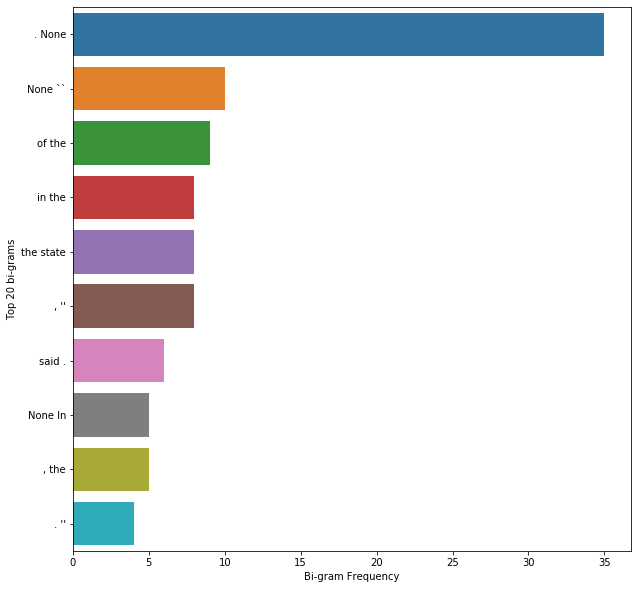

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

two_lists = list(zip(*top_10_bigrams)) #* is the unpacking operator
x = [" ".join([str(i or 'None') for i in bigram_tuple]) for  bigram_tuple in two_lists[0]] # create two word strings and replace None with 'None'
y = list(two_lists[1])
print(x,y)

plt.figure(figsize=(10,10))
plt.xlabel("Bi-gram Frequency")
plt.ylabel("Top 20 bi-grams")
sns.barplot(x=y,y=x)

### Analyze

To anaylze bigrams that start with the same word, create a dictionary of dictionaries.

In [24]:
from collections import defaultdict
counts = defaultdict(lambda: defaultdict(int))
for sentence in tokenized_sentences:
    for w1, w2 in bigrams(sentence, pad_right=True, pad_left=True):
        counts[w1][w2] += 1
print (counts["the"]["state"]) 
print (counts["the"]["xyz"])
print(counts[None]["The"]) 
print(len(counts))

8
0
3
492


Print all bi-grams where 'the' is the first word.

In [25]:
for w2 in counts["the"]:
    print("the", w2, ":", counts["the"][w2])

the dark : 1
the arctic : 1
the state : 8
the morning : 1
the country : 1
the lights : 1
the grid : 1
the remaining : 1
the point : 1
the load : 1
the clock : 1
the overloaded : 1
the company : 1
the outages : 2
the Texas : 1
the mayor : 1
the crisis : 1
the middle : 1
the Dallas-Fort : 1
the ongoing : 1
the temperature : 1
the people : 1
the individuals : 1
the house : 2
the other : 2
the ultra-cold : 1
the equipment : 1
the weather : 1
the cause : 1
the fire : 1
the Houston : 1
the U.S.-Mexico : 1
the Appalachians : 1
the National : 1
the most : 1
the history : 1
the AP : 1
the winter : 1
the xyz : 0


In [26]:
print(counts['the'])

defaultdict(<class 'int'>, {'dark': 1, 'arctic': 1, 'state': 8, 'morning': 1, 'country': 1, 'lights': 1, 'grid': 1, 'remaining': 1, 'point': 1, 'load': 1, 'clock': 1, 'overloaded': 1, 'company': 1, 'outages': 2, 'Texas': 1, 'mayor': 1, 'crisis': 1, 'middle': 1, 'Dallas-Fort': 1, 'ongoing': 1, 'temperature': 1, 'people': 1, 'individuals': 1, 'house': 2, 'other': 2, 'ultra-cold': 1, 'equipment': 1, 'weather': 1, 'cause': 1, 'fire': 1, 'Houston': 1, 'U.S.-Mexico': 1, 'Appalachians': 1, 'National': 1, 'most': 1, 'history': 1, 'AP': 1, 'winter': 1, 'xyz': 0})


This code computes the probability of each bigram.

In [27]:
for w1 in counts:
    total_count = float(sum(counts[w1].values()))
    for w2 in counts[w1]:
        counts[w1][w2] /= total_count

print(counts["the"]["state"])
print (counts["the"]["xyz"])
print(counts[None]["The"])

0.16666666666666666
0.0
0.075


We can also use `CountVectorizer` for analyze bigrams. Use parameter `ngram_range`.  

In [31]:
vectorizer2 = CountVectorizer(ngram_range=(2, 2)) #min, max range
vec2=vectorizer2.fit(corpus)
print(vec2.vocabulary_)

{'after days': 22, 'days of': 170, 'of living': 423, 'living in': 355, 'in the': 319, 'the dark': 656, 'dark in': 168, 'in crude': 308, 'crude conditions': 155, 'conditions millions': 144, 'millions of': 390, 'of texans': 432, 'texans had': 623, 'had their': 261, 'their power': 693, 'power restored': 502, 'restored on': 540, 'on thursday': 445, 'thursday bringing': 715, 'bringing some': 114, 'some relief': 582, 'relief amid': 519, 'amid the': 38, 'the arctic': 648, 'arctic blast': 63, 'blast that': 110, 'that brought': 634, 'brought the': 116, 'the state': 681, 'state water': 600, 'water and': 776, 'and power': 47, 'power infrastructure': 501, 'infrastructure to': 325, 'to its': 728, 'its knees': 332, 'knees early': 340, 'early in': 189, 'the morning': 670, 'morning nearly': 397, 'nearly half': 403, 'half million': 264, 'million residents': 389, 'residents were': 535, 'were without': 805, 'without electricity': 828, 'electricity but': 195, 'but by': 117, 'by midday': 120, 'midday just'

In [32]:
matrix = vec2.transform(corpus)
print(matrix.shape)
counts = matrix.toarray() 
print(counts)

(1, 845)
[[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 2 1 1 1 1
  1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 2 1 3 1 1 2 1 1 1 1 1 1 1 1 4 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 8 3 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 3 1
  1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2 1 1
  1 2 9 1 1 1 1 1 1 1 1 1 4 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1
  1 1 1 2 1 1 1 1 1 1 1 1 1 1

In [33]:
bigrams_freq = [(bigram, counts[0, idx]) for bigram, idx in vec2.vocabulary_.items()]
bigrams_freq =sorted(bigrams_freq, key = lambda freq: freq[1], reverse=True) #sort by bigram count
top_n_bigrams= bigrams_freq[:10]
print(top_n_bigrams)

[('of the', 9), ('in the', 8), ('the state', 8), ('on the', 4), ('have been', 4), ('without electricity', 3), ('without power', 3), ('to the', 3), ('director of', 3), ('more than', 3)]


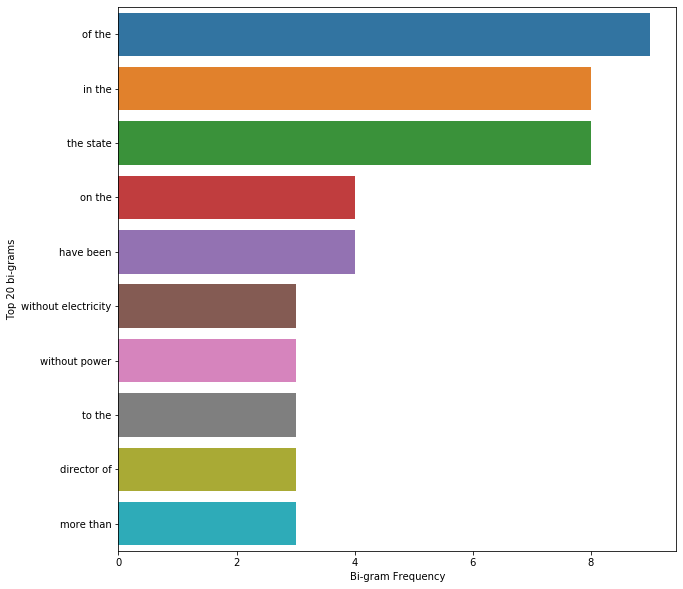

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

two_tuples = list(zip(*top_n_bigrams)) #* is the unpacking operator
x = list(two_tuples[0])
y = list(two_tuples[1])

#x,y=map(list,split_lists) #The map() function executes a specified function for each item in an iterable. The item is sent to the function as a parameter, 
plt.figure(figsize=(10,10))
plt.xlabel("Bi-gram Frequency")
plt.ylabel("Top 20 bi-grams")
sns.barplot(x=y,y=x)

## Trigram Model
Trigrams are less frequent.  Explore using a larger corpus.

In [35]:
import pandas as pd
from nltk.corpus import inaugural

speeches = []
for fileid in inaugural.fileids():
    speeches.append((fileid, inaugural.raw(fileid)))

addresses = pd.DataFrame(speeches, columns=["filename","text"])
inaugural_corpus =  addresses["text"]
vectorizer3 = CountVectorizer(ngram_range=(3, 3)) 
vec3=vectorizer3.fit(inaugural_corpus)
matrix3=vectorizer3.transform(inaugural_corpus)
matrix3.shape
counts = matrix3.toarray() 
print(counts)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [36]:
sum_trigrams = matrix3.sum(axis=0)  #counts for each trigram across all speeches
print(sum_trigrams)

[[1 1 2 ... 1 1 1]]


In [37]:
trigrams_freq = [(trigram, sum_trigrams[0, idx]) for trigram, idx in vec3.vocabulary_.items()]
trigrams_freq =sorted(trigrams_freq, key = lambda freq: freq[1], reverse=True) #sort by trigram count
top_10_trigrams= trigrams_freq[:10]
print(top_10_trigrams)

[('the united states', 150), ('of the united', 98), ('of the people', 96), ('of the government', 79), ('of the world', 66), ('of our country', 50), ('of the union', 49), ('it is the', 48), ('of our people', 48), ('as well as', 47)]


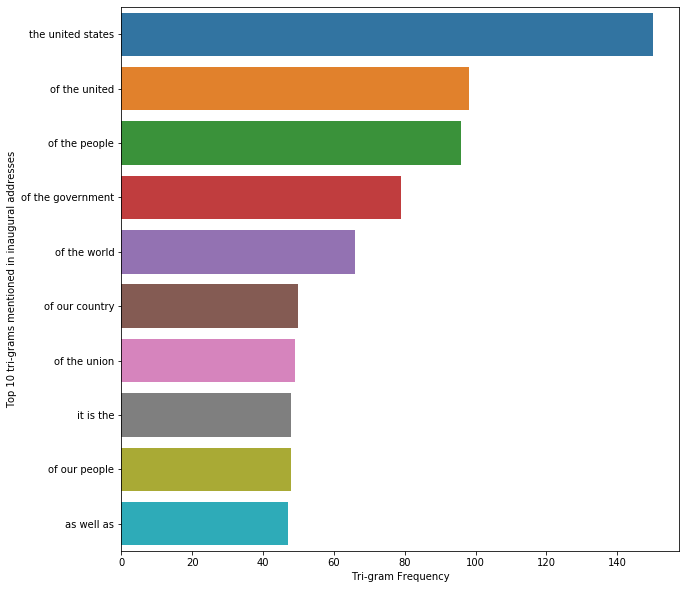

In [39]:
tuples = list(zip(*top_10_trigrams)) #unpack
x = list(tuples[0])
y = list(tuples[1])

plt.figure(figsize=(10,10))
plt.xlabel("Tri-gram Frequency")
plt.ylabel("Top 10 tri-grams mentioned in inaugural addresses")
sns.barplot(x=y,y=x)